In [1]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import scipy
import numpy as np
from sklearn.preprocessing import MinMaxScaler
import seaborn as sns
import matplotlib.pyplot as plt
import math

In [2]:
train = pd.read_csv('train_cleaned.csv')

## Handling Outliers

In [3]:
outliers = ['AMT_ANNUITY','AMT_CREDIT', 'AMT_GOODS_PRICE', 
'CNT_CHILDREN', 'AMT_INCOME_TOTAL', 'DAYS_EMPLOYED',
'REGION_POPULATION_RELATIVE', 'CNT_FAM_MEMBERS',
'HOUR_APPR_PROCESS_START', 'APARTMENTS_MODE', 
'BASEMENTAREA_MODE','YEARS_BEGINEXPLUATATION_MODE','YEARS_BUILD_MODE',
'COMMONAREA_MODE', 'ELEVATORS_MODE','ENTRANCES_MODE','FLOORSMAX_MODE',
'FLOORSMIN_MODE','LANDAREA_MODE','LIVINGAPARTMENTS_MODE','LIVINGAREA_MODE',
'NONLIVINGAPARTMENTS_MODE','NONLIVINGAREA_MODE','TOTALAREA_MODE',
'OBS_30_CNT_SOCIAL_CIRCLE', 'DEF_30_CNT_SOCIAL_CIRCLE','DEF_60_CNT_SOCIAL_CIRCLE',
'DAYS_LAST_PHONE_CHANGE','AMT_REQ_CREDIT_BUREAU_HOUR','AMT_REQ_CREDIT_BUREAU_DAY',
'AMT_REQ_CREDIT_BUREAU_WEEK','AMT_REQ_CREDIT_BUREAU_MON', 'AMT_REQ_CREDIT_BUREAU_QRT',
 'AMT_REQ_CREDIT_BUREAU_YEAR', 'AMT_RECIVABLE']

for i in outliers: 
        total_negative_values = (train[i] < 0).sum()
        print(f"Total negative values in {i}: {total_negative_values}")

Total negative values in AMT_ANNUITY: 0
Total negative values in AMT_CREDIT: 0
Total negative values in AMT_GOODS_PRICE: 0
Total negative values in CNT_CHILDREN: 0
Total negative values in AMT_INCOME_TOTAL: 0
Total negative values in DAYS_EMPLOYED: 398053
Total negative values in REGION_POPULATION_RELATIVE: 0
Total negative values in CNT_FAM_MEMBERS: 0
Total negative values in HOUR_APPR_PROCESS_START: 0
Total negative values in APARTMENTS_MODE: 0
Total negative values in BASEMENTAREA_MODE: 0
Total negative values in YEARS_BEGINEXPLUATATION_MODE: 0
Total negative values in YEARS_BUILD_MODE: 0
Total negative values in COMMONAREA_MODE: 0
Total negative values in ELEVATORS_MODE: 0
Total negative values in ENTRANCES_MODE: 0
Total negative values in FLOORSMAX_MODE: 0
Total negative values in FLOORSMIN_MODE: 0
Total negative values in LANDAREA_MODE: 0
Total negative values in LIVINGAPARTMENTS_MODE: 0
Total negative values in LIVINGAREA_MODE: 0
Total negative values in NONLIVINGAPARTMENTS_MODE

In [4]:
train['DAYS_LAST_PHONE_CHANGE'] = train['DAYS_LAST_PHONE_CHANGE']  + 4173
train['DAYS_EMPLOYED'] = train['DAYS_EMPLOYED']  + 17912
train['AMT_RECIVABLE'] = train['AMT_RECIVABLE'] + 223225

In [9]:
for i in outliers: 
        total_negative_values = (train[i] < 0).sum()
        print(f"Total negative values in {i}: {total_negative_values}")

Total negative values in AMT_ANNUITY: 0
Total negative values in AMT_CREDIT: 0
Total negative values in AMT_GOODS_PRICE: 0
Total negative values in CNT_CHILDREN: 0
Total negative values in AMT_INCOME_TOTAL: 0
Total negative values in DAYS_EMPLOYED: 0
Total negative values in REGION_POPULATION_RELATIVE: 0
Total negative values in CNT_FAM_MEMBERS: 0
Total negative values in HOUR_APPR_PROCESS_START: 0
Total negative values in APARTMENTS_MODE: 0
Total negative values in BASEMENTAREA_MODE: 0
Total negative values in YEARS_BEGINEXPLUATATION_MODE: 0
Total negative values in YEARS_BUILD_MODE: 0
Total negative values in COMMONAREA_MODE: 0
Total negative values in ELEVATORS_MODE: 0
Total negative values in ENTRANCES_MODE: 0
Total negative values in FLOORSMAX_MODE: 0
Total negative values in FLOORSMIN_MODE: 0
Total negative values in LANDAREA_MODE: 0
Total negative values in LIVINGAPARTMENTS_MODE: 0
Total negative values in LIVINGAREA_MODE: 0
Total negative values in NONLIVINGAPARTMENTS_MODE: 0
T

In [6]:
from scipy import stats

# Transformasi log untuk data yang positif
for i in outliers:
    train[i] = np.log(train[i] + 1)  # Tambahkan 1 untuk menghindari log(0)

print("Before removing outliers:", len(train))

# Hapus outlier menggunakan Z-score
for i in outliers:
    if train[i].dtype in ['int64', 'float64']:
        z_scores = np.abs(stats.zscore(train[i]))
        train = train[(z_scores <= 3) | (train[i].isna())]

print("After removing outliers:", len(train))


Before removing outliers: 398059
After removing outliers: 231814


## Normalization Transformation

In [7]:
X = train.drop(columns=['TARGET'])
y = train[['TARGET']]

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [8]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
for i in list(X_train.select_dtypes(include = ['int64', 'float64']).columns):
    fitted = scaler.fit(X_train[[i]])
    X_train[i] = fitted.transform(X_train[[i]])
    X_test[i] = fitted.transform(X_test[[i]])

In [10]:
train = pd.concat([X_train, y_train], axis = 1)
test = pd.concat([X_test, y_test], axis = 1)

X_train = train.drop(columns=['TARGET'])
y_train = train[['TARGET']]

X_test = test.drop(columns=['TARGET'])
y_test = test[['TARGET']]

## Feature Encoding

In [11]:
X_train['is_currency_1'] = X_train['CREDIT_CURRENCY'].apply(lambda x : 1 if x == 'currency 1' else 0)
X_test['is_currency_1'] = X_test['CREDIT_CURRENCY'].apply(lambda x : 1 if x == 'currency 1' else 0)

X_train['FLAG_LAST_APPL_PER_CONTRACT'] = X_train['FLAG_LAST_APPL_PER_CONTRACT'].map({'N' : 0,
                                                'Y' : 1})
X_test['FLAG_LAST_APPL_PER_CONTRACT'] = X_test['FLAG_LAST_APPL_PER_CONTRACT'].map({'N' : 0,
                                                'Y' : 1})

X_train['EMERGENCYSTATE_MODE'] = X_train['EMERGENCYSTATE_MODE'].map({'No' : 0,
                                                'Yes' : 1})

X_test['EMERGENCYSTATE_MODE'] = X_test['EMERGENCYSTATE_MODE'].map({'No' : 0,
                                                'Yes' : 1})

X_train['is_stone'] = X_train['WALLSMATERIAL_MODE'].apply(lambda x : 1 if x == 'Stone, brick' else 0)
X_test['is_stone'] = X_test['WALLSMATERIAL_MODE'].apply(lambda x : 1 if x == 'Stone, brick' else 0)

X_train['is_block_of_flats'] = X_train['HOUSETYPE_MODE'].apply(lambda x : 1 if x == 'block of flats' else 0)
X_test['is_block_of_flats'] = X_test['HOUSETYPE_MODE'].apply(lambda x : 1 if x == 'block of flats' else 0)

X_train['is_reg_oper_account'] = X_train['FONDKAPREMONT_MODE'].apply(lambda x : 1 if x == 'reg oper account' else 0)
X_test['is_reg_oper_account'] = X_test['FONDKAPREMONT_MODE'].apply(lambda x : 1 if x == 'reg oper account' else 0)

X_train['is_business_entity_type_3'] = X_train['ORGANIZATION_TYPE'].apply(lambda x : 1 if x == 'Business Entity Type 3' else 0)
X_test['is_business_entity_type_3'] = X_test['ORGANIZATION_TYPE'].apply(lambda x : 1 if x == 'Business Entity Type 3' else 0)

X_train = pd.concat([X_train, pd.get_dummies(X_train['WEEKDAY_APPR_PROCESS_START'], prefix = 'WEEKDAY_APPR_PROCESS_START')], axis = 1)
X_test = pd.concat([X_test, pd.get_dummies(X_test['WEEKDAY_APPR_PROCESS_START'], prefix = 'WEEKDAY_APPR_PROCESS_START')], axis = 1)

X_train['is_laborers'] = X_train['OCCUPATION_TYPE'].apply(lambda x : 1 if x == 'Laborers' else 0)
X_test['is_laborers'] = X_test['OCCUPATION_TYPE'].apply(lambda x : 1 if x == 'Laborers' else 0)

X_train['is_house'] = X_train['NAME_HOUSING_TYPE'].apply(lambda x : 1 if x == 'House / apartment' else 0)
X_test['is_house'] = X_test['NAME_HOUSING_TYPE'].apply(lambda x : 1 if x == 'House / apartment' else 0)

X_train['is_married'] = X_train['NAME_FAMILY_STATUS'].apply(lambda x : 1 if x == 'Married' else 0)
X_test['is_married'] = X_test['NAME_FAMILY_STATUS'].apply(lambda x : 1 if x == 'Married' else 0)

X_train['is_secondary'] = X_train['NAME_EDUCATION_TYPE'].apply(lambda x : 1 if x == 'Secondary / secondary special' else 0)
X_test['is_secondary'] = X_test['NAME_EDUCATION_TYPE'].apply(lambda x : 1 if x == 'Secondary / secondary special' else 0)

X_train['is_cash_loans'] = X_train['NAME_CONTRACT_TYPE'].apply(lambda x : 1 if x == 'Cash loans' else 0)
X_test['is_cash_loans'] = X_test['NAME_CONTRACT_TYPE'].apply(lambda x : 1 if x == 'Cash loans' else 0)

X_train['is_female'] = X_train['CODE_GENDER'].apply(lambda x : 1 if x == 'F' else 0)
X_test['is_female'] = X_test['CODE_GENDER'].apply(lambda x : 1 if x == 'F' else 0)

X_train['FLAG_OWN_CAR'] = X_train['FLAG_OWN_CAR'].map({'N' : 0,
                                                'Y' : 1})
X_test['FLAG_OWN_CAR'] = X_test['FLAG_OWN_CAR'].map({'N' : 0,
                                                'Y' : 1})


X_train['FLAG_OWN_REALTY'] = X_train['FLAG_OWN_REALTY'].map({'N' : 0,
                                                'Y' : 1})
X_test['FLAG_OWN_REALTY'] = X_test['FLAG_OWN_REALTY'].map({'N' : 0,
                                                'Y' : 1})

X_train['is_unaccompanied'] = X_train['NAME_TYPE_SUITE'].apply(lambda x : 1 if x == 'Unaccompanied' else 0)
X_test['is_unaccompanied'] = X_test['NAME_TYPE_SUITE'].apply(lambda x : 1 if x == 'Unaccompanied' else 0)


X_train['is_working'] = X_train['NAME_INCOME_TYPE'].apply(lambda x : 1 if x == 'Working' else 0)
X_test['is_working'] = X_test['NAME_INCOME_TYPE'].apply(lambda x : 1 if x == 'Working' else 0)

In [12]:
col = ['SK_ID_CURR','NAME_TYPE_SUITE', 'NAME_INCOME_TYPE', 'CODE_GENDER', 'NAME_CONTRACT_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS',
       'NAME_HOUSING_TYPE', 'OCCUPATION_TYPE',  'WEEKDAY_APPR_PROCESS_START',
       'ORGANIZATION_TYPE', 'FONDKAPREMONT_MODE', 'HOUSETYPE_MODE', 'WALLSMATERIAL_MODE', 'CREDIT_CURRENCY']

X_train = X_train.drop(col, axis=1, errors='ignore')
X_test = X_test.drop(col, axis=1, errors='ignore')

## Feature Selection 

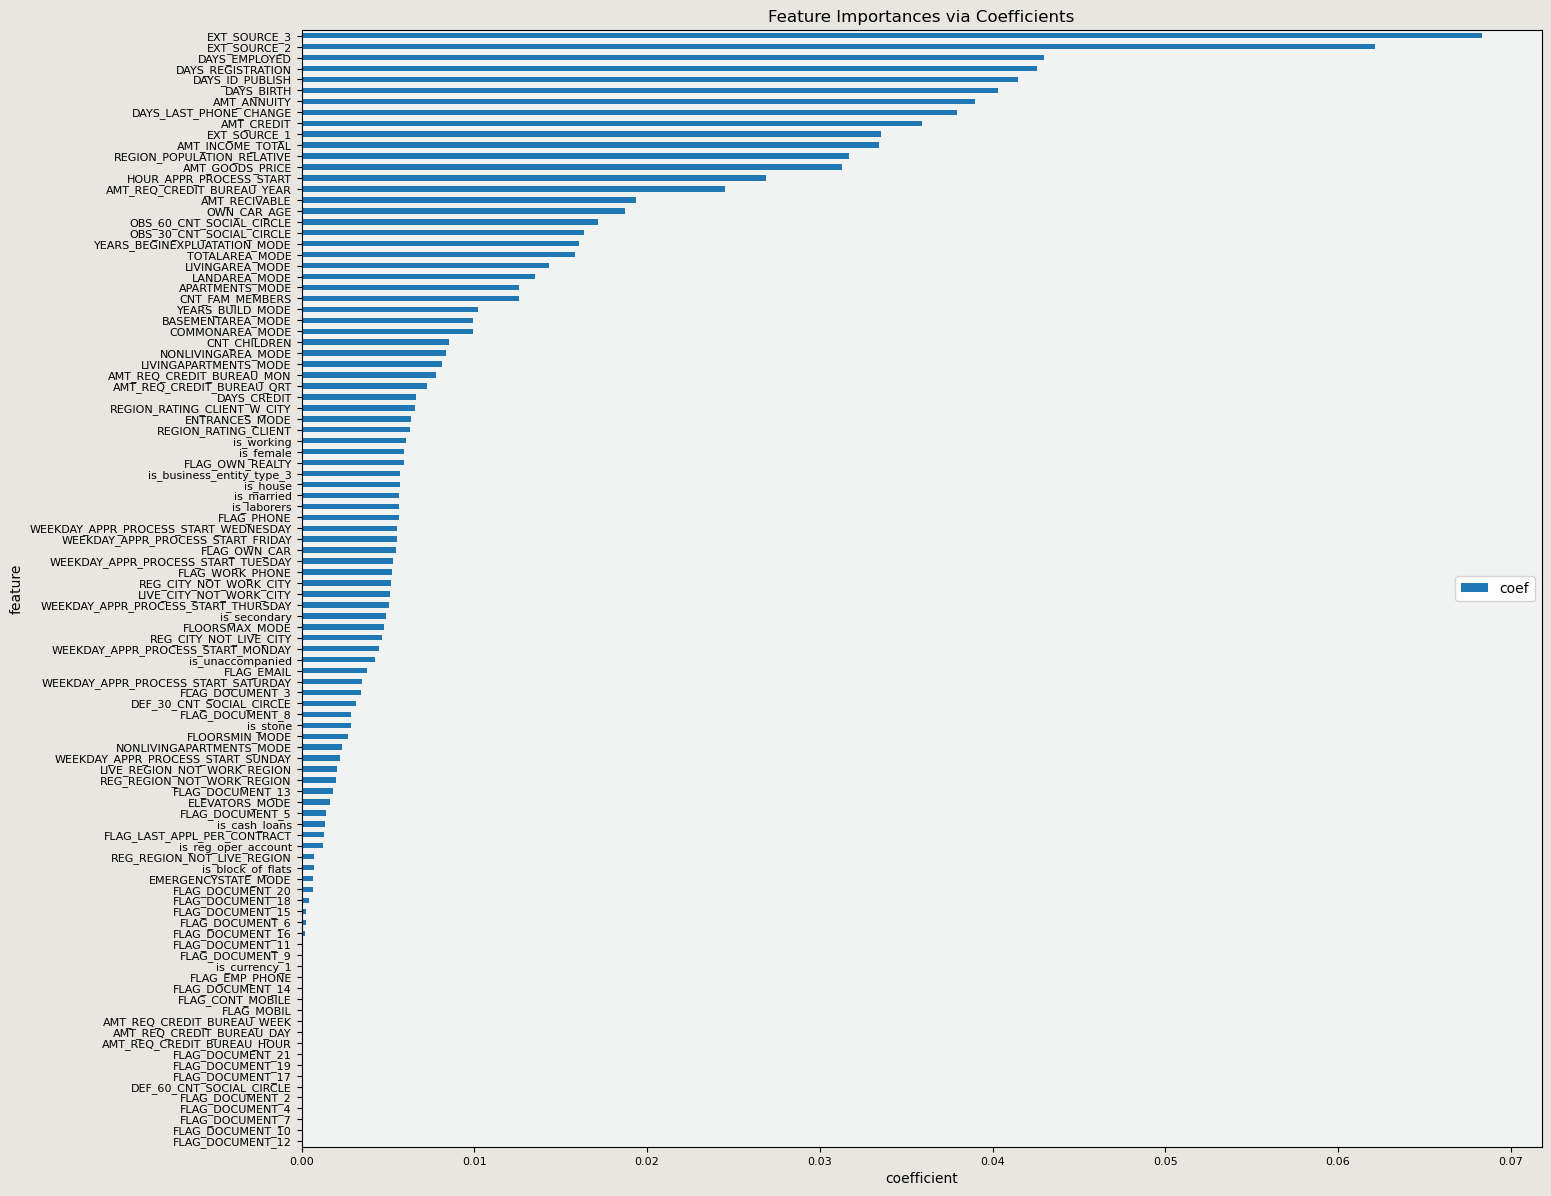

In [13]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier().fit(pd.concat([X_train, X_test]), pd.concat([y_train, y_test]))
importance = np.abs(clf.feature_importances_)
feature_names = np.array(X_train.columns)
plt.figure(figsize = (16, 14.5), facecolor='#e8e6e1')
ax = plt.axes()
ax.set_facecolor('#f1f2f2')
pd.DataFrame(list(zip(list(X_train.columns), clf.feature_importances_)), columns = ['feature', 'coef'])\
            .sort_values(by = ['coef'], ascending = True).reset_index(drop = True)\
            .plot(x = 'feature', kind = 'barh', fontsize = 8, ax = ax)
plt.title("Feature Importances via Coefficients")
plt.xlabel('coefficient')
plt.legend(loc = 'center right')

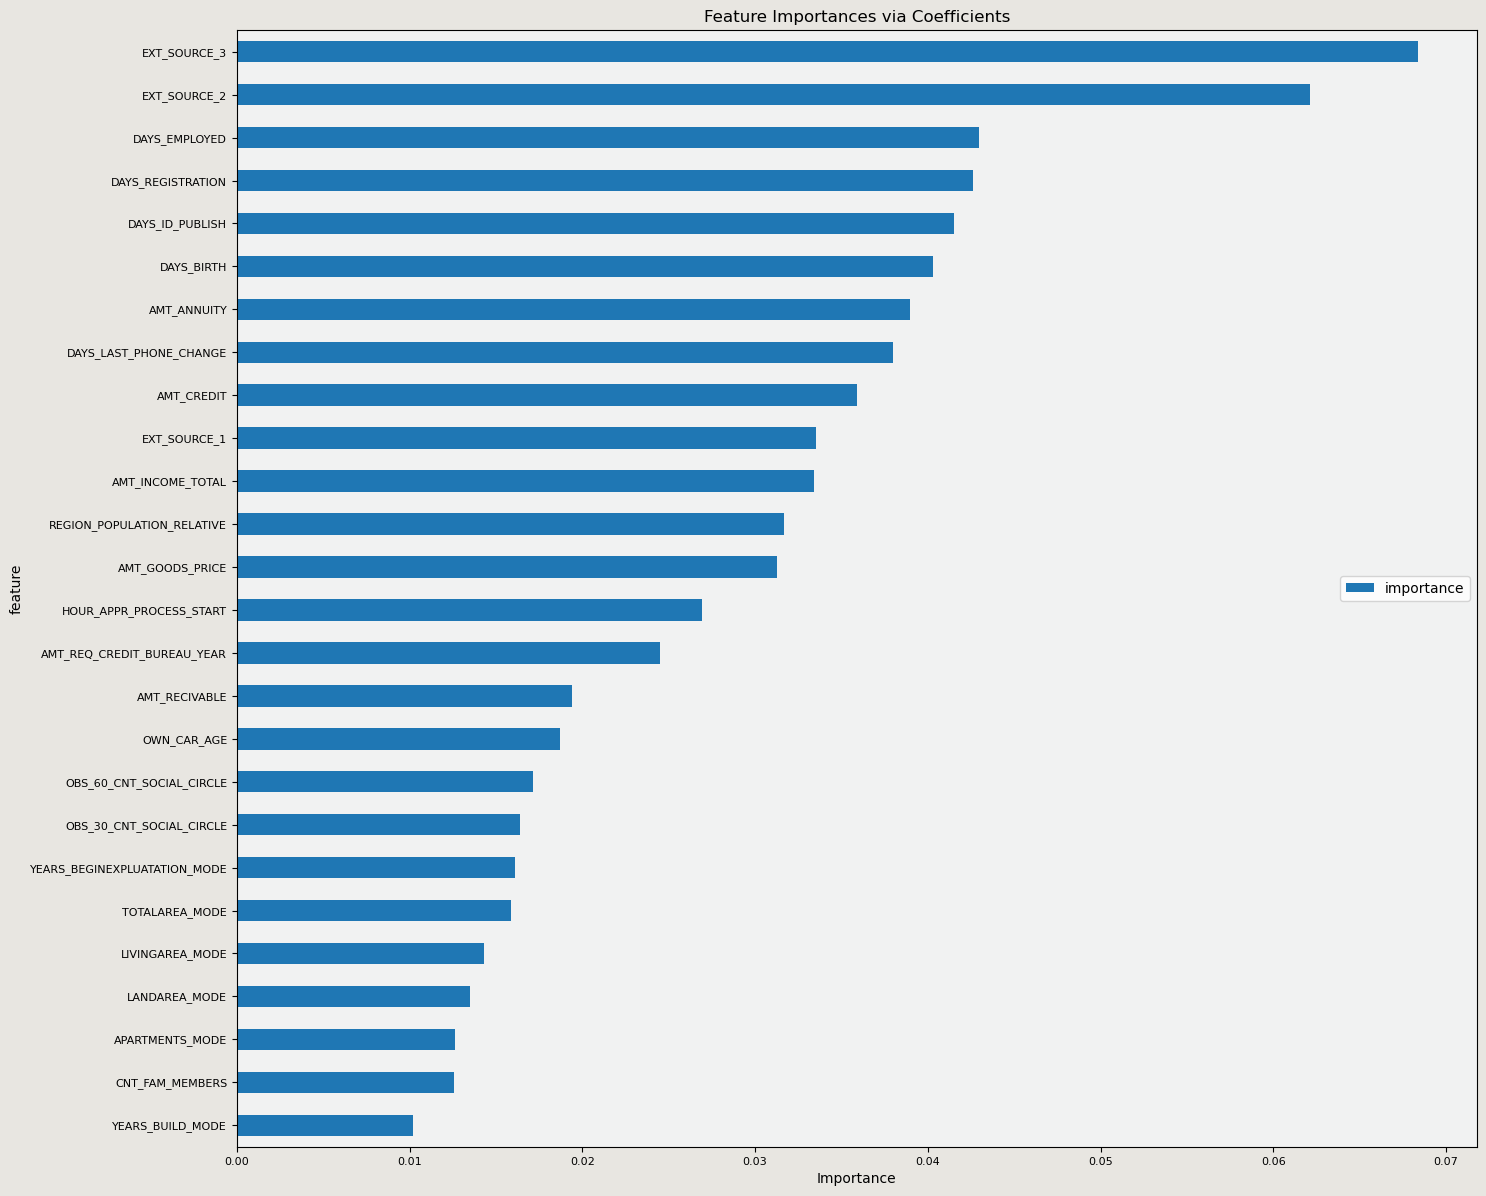

Selected Features:
3                 AMT_INCOME_TOTAL
4                       AMT_CREDIT
5                      AMT_ANNUITY
6                  AMT_GOODS_PRICE
7       REGION_POPULATION_RELATIVE
8                       DAYS_BIRTH
9                    DAYS_EMPLOYED
10               DAYS_REGISTRATION
11                 DAYS_ID_PUBLISH
12                     OWN_CAR_AGE
19                 CNT_FAM_MEMBERS
22         HOUR_APPR_PROCESS_START
29                    EXT_SOURCE_1
30                    EXT_SOURCE_2
31                    EXT_SOURCE_3
32                 APARTMENTS_MODE
34    YEARS_BEGINEXPLUATATION_MODE
35                YEARS_BUILD_MODE
41                   LANDAREA_MODE
43                 LIVINGAREA_MODE
46                  TOTALAREA_MODE
48        OBS_30_CNT_SOCIAL_CIRCLE
50        OBS_60_CNT_SOCIAL_CIRCLE
52          DAYS_LAST_PHONE_CHANGE
78      AMT_REQ_CREDIT_BUREAU_YEAR
80                   AMT_RECIVABLE
Name: feature, dtype: object


In [14]:
feature_importance_df = pd.DataFrame({'feature': feature_names, 'importance': clf.feature_importances_})

selected_features = feature_importance_df[feature_importance_df['importance'] >= 0.01]['feature']


plt.figure(figsize=(16, 14.5), facecolor='#e8e6e1')
ax = plt.axes()
ax.set_facecolor('#f1f2f2')
feature_importance_df.loc[feature_importance_df['feature'].isin(selected_features)]\
    .sort_values(by='importance', ascending=True)\
    .reset_index(drop=True)\
    .plot(x='feature', kind='barh', fontsize=8, ax=ax)
plt.title("Feature Importances via Coefficients")
plt.xlabel('Importance')
plt.legend(loc='center right')
plt.show()


print("Selected Features:")
print(selected_features)

In [15]:
col = ['AMT_INCOME_TOTAL',' AMT_CREDIT', 'AMT_ANNUITY','AMT_GOODS_PRICE',
          'REGION_POPULATION_RELATIVE','DAYS_BIRTH', 'DAYS_EMPLOYED', ' DAYS_REGISTRATION',
          'DAYS_ID_PUBLISH', ' CNT_FAM_MEMBERS', 'HOUR_APPR_PROCESS_START', 'EXT_SOURCE_1', 
          'EXT_SOURCE_2', 'EXT_SOURCE_3', 'APARTMENTS_MODE', ' BASEMENTAREA_MODE', ' YEARS_BEGINEXPLUATATION_MODE',
          'YEARS_BUILD_MODE', 'COMMONAREA_MODE', 'LANDAREA_MODE', 'LIVINGAREA_MODE', ' TOTALAREA_MODE',
          'OBS_30_CNT_SOCIAL_CIRCLE', 'DAYS_LAST_PHONE_CHANGE', ' AMT_REQ_CREDIT_BUREAU_YEAR', 'AMT_REQ_CREDIT_BUREAU_YEAR',
            'AMT_REQ_CREDIT_BUREAU_YEAR']

X_train = X_train.drop(columns = [i for i in X_train.columns if i not in col])
X_test = X_test.drop(columns = [i for i in X_test.columns if i not in col])

## Class Imbalance

In [16]:
from imblearn import over_sampling

X_train_over, y_train_over = over_sampling.SMOTE(sampling_strategy = 0.5).fit_resample(X_train, y_train)

In [17]:
pd.concat([X_train, y_train], axis = 1).duplicated().sum()

147035

In [18]:
pd.concat([X_test, y_test], axis = 1).duplicated().sum()

56259

In [19]:
train = pd.concat([X_train, y_train], axis = 1)
test = pd.concat([X_test, y_test], axis = 1)

train = train.drop_duplicates()
test = test.drop_duplicates()

X_train = train.drop(columns=['TARGET'])
y_train = train[['TARGET']]

X_test = test.drop(columns=['TARGET'])
y_test = test[['TARGET']]

## Modelling

Setelah dataset dipreprocessing maka kami akan melatih dataset train terlebih dahulu dan kemudian setelah itu kami menguji pada dataset test, serta melihat evaluasi model tersebut. Disini kami menggunakan 6 model dan memilih model skor evaluasi akurasi tertinggi.

In [20]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.model_selection import cross_validate
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier

def eval_classification():
    n_estimators = [int(x) for x in np.linspace(1, 200, 50)]
    criterion = ['gini', 'entropy']
    max_depth = [int(x) for x in np.linspace(2, 100, 50)]
    min_samples_split = [int(x) for x in np.linspace(2, 20, 10)]
    min_samples_leaf = [int(x) for x in np.linspace(2, 20, 10)]
    
    hyperparameters = dict(n_estimators=n_estimators, criterion=criterion, max_depth=max_depth,
                           min_samples_split=min_samples_split, min_samples_leaf=min_samples_leaf)
    
    list_model = {'Logistic Regression' : LogisticRegression(),
                  'KNN Classifier' : KNeighborsClassifier(),
                  'Decision Tree Classifier' : DecisionTreeClassifier(),
                  'AdaBoost Classifier' : AdaBoostClassifier(),
                  'XGBoost Classifier' : XGBClassifier(),
                  'LGBM Classifier' : LGBMClassifier()}
    
    for key, val in list_model.items():
        model = val
        model.fit(X_train_over, y_train_over)
    
        y_pred = model.predict(X_test)
        y_pred_train = model.predict(X_train)
        y_pred_proba = model.predict_proba(X_test)
        y_pred_proba_train = model.predict_proba(X_train)

        print(key, "Evaluation Result")
        print("Accuracy (Train Set): %.2f" % accuracy_score(y_train, y_pred_train))
        print("Accuracy (Test Set): %.2f" % accuracy_score(y_test, y_pred))
        print("Precision (Train Set): %.2f" % precision_score(y_train, y_pred_train))
        print("Precision (Test Set): %.2f" % precision_score(y_test, y_pred))
        print("Recall (Train Set): %.2f" % recall_score(y_train, y_pred_train))
        print("Recall (Test Set): %.2f" % recall_score(y_test, y_pred))
        print("F1-Score (Train Set): %.2f" % f1_score(y_train, y_pred_train))
        print("F1-Score (Test Set): %.2f" % f1_score(y_test, y_pred))

        print("roc_auc (train-proba): %.2f" % roc_auc_score(y_train, y_pred_proba_train[:, 1]))
        print("roc_auc (test-proba): %.2f" % roc_auc_score(y_test, y_pred_proba[:, 1]))
        print("")

In [21]:
eval_classification()

Logistic Regression Evaluation Result
Accuracy (Train Set): 0.84
Accuracy (Test Set): 0.84
Precision (Train Set): 0.25
Precision (Test Set): 0.25
Recall (Train Set): 0.32
Recall (Test Set): 0.33
F1-Score (Train Set): 0.28
F1-Score (Test Set): 0.28
roc_auc (train-proba): 0.71
roc_auc (test-proba): 0.71

KNN Classifier Evaluation Result
Accuracy (Train Set): 0.98
Accuracy (Test Set): 0.98
Precision (Train Set): 0.81
Precision (Test Set): 0.84
Recall (Train Set): 0.99
Recall (Test Set): 0.97
F1-Score (Train Set): 0.89
F1-Score (Test Set): 0.90
roc_auc (train-proba): 1.00
roc_auc (test-proba): 0.99

Decision Tree Classifier Evaluation Result
Accuracy (Train Set): 1.00
Accuracy (Test Set): 0.99
Precision (Train Set): 1.00
Precision (Test Set): 0.96
Recall (Train Set): 1.00
Recall (Test Set): 0.98
F1-Score (Train Set): 1.00
F1-Score (Test Set): 0.97
roc_auc (train-proba): 1.00
roc_auc (test-proba): 0.99

AdaBoost Classifier Evaluation Result
Accuracy (Train Set): 0.83
Accuracy (Test Set): 0.

### Hyperparameter Tuning

Setelah melakukan evaluasi beberapa model, terlihat bahwa model decision tree perlu dilakukan hyperparamter tuning karena modelini berpotensi dengan skor akurasi tertinggi, hyperparameter tuning dilakukan dengan membuat learning curve dengan mencari parameter max depth yang paling optimal 

param value: 1; train accuracy: 0.6897552204650402; test accuracy: 0.8157458979376787
param value: 34; train accuracy: 0.9997729739056207; test accuracy: 0.9933764865271715
param value: 67; train accuracy: 1.0; test accuracy: 0.9937528225199458
param value: 100; train accuracy: 1.0; test accuracy: 0.9939033569170556


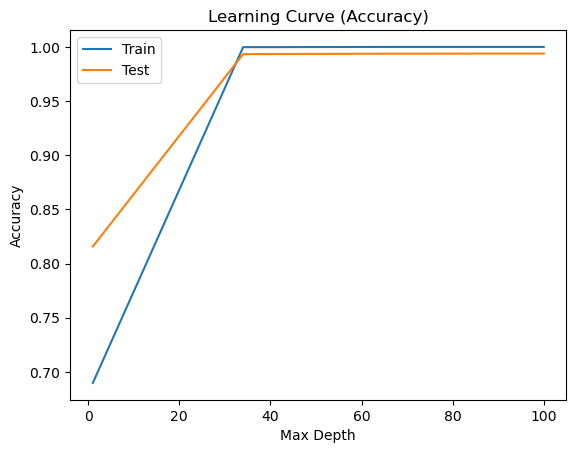

In [29]:
from sklearn.metrics import accuracy_score

def draw_learning_curve(param_values):
    train_scores = []
    test_scores = []

    for i in param_values:
        model = DecisionTreeClassifier(max_depth=i)
        model.fit(X_train_over, y_train_over)

      
        y_pred_train = model.predict(X_train_over)
        train_accuracy = accuracy_score(y_train_over, y_pred_train)
        train_scores.append(train_accuracy)

      
        y_pred_test = model.predict(X_test)
        test_accuracy = accuracy_score(y_test, y_pred_test)
        test_scores.append(test_accuracy)

        print('param value: ' + str(i) + '; train accuracy: ' + str(train_accuracy) + '; test accuracy: ' + str(test_accuracy))

    plt.plot(param_values, train_scores, label='Train')
    plt.plot(param_values, test_scores, label='Test')
    plt.xlabel('Max Depth')
    plt.ylabel('Accuracy')
    plt.title('Learning Curve (Accuracy)')
    plt.legend()
    plt.show()

param_values = [int(x) for x in np.linspace(1, 100, 4)]
draw_learning_curve(param_values)


In [33]:
best_params = {'min_samples_split': 2, 'min_samples_leaf': 1, 'max_depth': 30}
tree_model = DecisionTreeClassifier(**best_params)
tree_model.fit(X_train_over, y_train_over)

# Calculate accuracy for the training and test data
train_accuracy_tree = accuracy_score(y_train_over, tree_model.predict(X_train_over))
test_accuracy_tree = accuracy_score(y_test, tree_model.predict(X_test))

print('*'*50)
print('Train Accuracy (Decision Tree): %.3f' % train_accuracy_tree)
print('Test Accuracy (Decision Tree): %.3f' % test_accuracy_tree)
print('*'*50)


**************************************************
Train Accuracy (Decision Tree): 0.998
Test Accuracy (Decision Tree): 0.991
**************************************************


### Confusion Matrix

Setelah menemukan model dengan skor akurasi terbaik, kami menampilkan confusion matrix untuk menyediakan gambaran rinci tentang kinerja model dengan membandingkan hasil prediksi model dengan kenyataan yang sebenarnya.

Confusion matrix:
 [[146683    143]
 [   248  73165]]


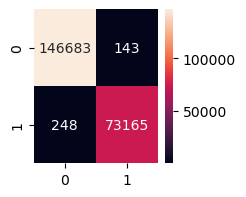

In [35]:
from sklearn.metrics import confusion_matrix

y_predicted_train = tree_model.predict(X_train_over)
cma = confusion_matrix(y_train_over, y_predicted_train)
print('Confusion matrix:\n', cma)

df_cm = pd.DataFrame(cma, range(2), columns=range(2))
plt.figure(figsize=(2, 2))
sns.heatmap(df_cm, annot=True, annot_kws={"size": 10}, fmt='g')
plt.show()

- True Positive (TP): Model memprediksi data ada di kelas positif dan yang sebenarnya data memang ada di kelas positif. Dalam kasus ini, terdapat 146.683 data yang diprediksi positif dan ternyata benar-benar positif.
- False Positive (FP): Model memprediksi data ada di kelas positif dan yang sebenarnya data ada di kelas negatif. Dalam kasus ini, terdapat 248 data yang diprediksi positif dan ternyata benar-benar negatif.
- True Negative (TN): Model memprediksi data ada di kelas negatif dan yang sebenarnya data memang ada di kelas negatif. Dalam kasus ini, terdapat 73.165 data yang diprediksi negatif dan ternyata benar-benar negatif.
- False Negative (FN): Model memprediksi data ada di kelas negatif dan yang sebenarnya data ada di kelas positif. Dalam kasus ini, terdapat 143 data yang diprediksi negatif dan ternyata benar-benar positif.


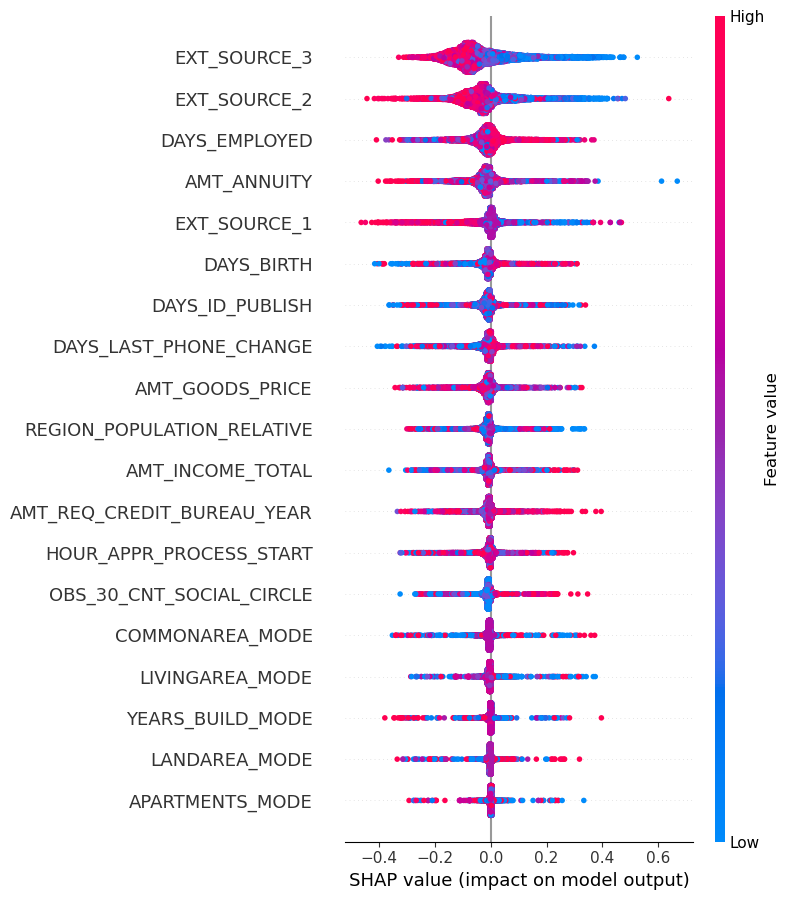

In [36]:
import shap
explainer = shap.TreeExplainer(tree_model)
shap_values = explainer.shap_values(X_test)
shap.summary_plot(shap_values[1], X_test) # Summary shap value terhadap label positive

Variabel yang paling penting dalam memprediksi kelayakan kredit adalah:

- EXT_SOURCE_3
- EXT_SOURCE_2
- DAYS_EMPLOYED

Variabel EXT_SOURCE_3 dan EXT_SOURCE_2 menunjukkan skor kredit dari dua sumber eksternal. Skor kredit ini memiliki pengaruh positif terhadap prediksi kesulitan pembayaran. Artinya, semakin tinggi skor kredit seseorang, semakin kecil kemungkinan mereka untuk mengalami kesulitan pembayaran.

Variabel DAYS_EMPLOYED menunjukkan berapa lama dalam hari seseorang telah bekerja di pekerjaan terakhirnya sebelum mengajukan kredit. Variabel ini memiliki pengaruh positif terhadap prediksi kesulitan pembayaran. Artinya, semakin lama seseorang bekerja di pekerjaan terakhirnya, semakin kecil kemungkinan mereka untuk mengalami kesulitan pembayaran.

Nilai SHAP yang negatif menunjukkan bahwa skor kredit tinggi dari sumber eksternal ketiga dan kedua menurunkan prediksi kesulitan pembayaran. Artinya, klien tersebut memiliki skor kredit yang rendah, yang merupakan faktor risiko untuk kesulitan pembayaran.

Nilai SHAP untuk DAYS_EMPLOYED semakin tinggi seiring dengan bertambahnya nilai DAYS_EMPLOYED. Ini menunjukkan bahwa semakin lama seseorang bekerja di pekerjaan terakhirnya, semakin kecil kemungkinan mereka untuk mengalami kesulitan pembayaran